In [1]:
# Fish Stock Classification

In [2]:
"""Prediction/Classification model (Multiclass Classification) for prediciting the Species of a Fish using various features such as Height,length,weight,etc"""

'Prediction/Classification model (Multiclass Classification) for prediciting the Species of a Fish using various features such as Height,length,weight,etc'

In [3]:
#importing Libraries

import pandas as pd
import numpy as np
import os

In [4]:
dataset = pd.read_csv(r'C:\Users\IDEAPAD 320\Desktop\MLR\Fish.csv')
safedataset = pd.read_csv(r'C:\Users\IDEAPAD 320\Desktop\MLR\Fish.csv')

In [5]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


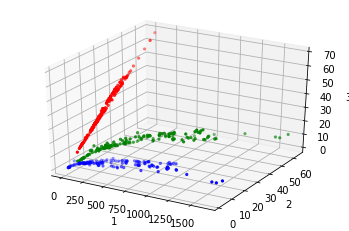

In [7]:
#visualising the dataset to know if we can find some obvious patters 

import matplotlib.pyplot as plt

X = dataset.iloc[:, [1,2,3,4,5,6]].values
y = dataset.iloc[:, 0].values

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
_w = dataset["Weight"]
_h = dataset["Height"]
_wd = dataset["Width"]
_l1 = dataset["Length1"]
_l2 = dataset["Length2"]
_l3 = dataset["Length3"]
ax.scatter(_w,_h,_wd,c = 'b', marker = 'o' , s = 5)
ax.scatter(_l1,_l2,_l3,c = 'r', marker = 'o' , s = 5)
ax.scatter(_w,_l2,_h,c = 'g', marker = 'o' , s = 5)
ax.set_xlabel("1")
ax.set_ylabel("2")
ax.set_zlabel("3")
plt.show()

In [8]:
#preparing the depended vector
factor = pd.factorize(dataset['Species'])
dataset.Species = factor[0]
definitions = factor[1]
print(dataset.Species.head())
print(definitions)


0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64
Index(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'], dtype='object')


In [9]:
#safedataset will still have our dataset while we manipulated the dataset
safedataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [19]:
#scoring accuracy
classifier.score(X_test,y_test)


0.8

In [26]:
#finding best parameters through grid search
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1, 10, 20, 30,40,50], 'criterion': ['entropy']},
              {'n_estimators': [1, 10, 20, 30,40,50], 'criterion': ['gini']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [27]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

C:\Users\IDEAPAD 320\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\IDEAPAD 320\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
#just a warning regarding deprecation


In [29]:
#getting best parameters ( although a ran it already and replaced the test params with ideal)
best_parameters

{'criterion': 'entropy', 'n_estimators': 30}

In [30]:
best_accuracy


0.8403361344537815

In [31]:
'''Following method can be used to save the model and predicting from it without training it again'''


'Following method can be used to save the model and predicting from it without training it again'

In [32]:
from sklearn.externals import joblib
joblib.dump(classifier,'fishclassifier-joblib')

['fishclassifier-joblib']

In [33]:
"""The above file can be loaded and used for prediction as shown"""

'The above file can be loaded and used for prediction as shown'

In [34]:
model = joblib.load('fishclassifier-joblib')